In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_3183/265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
lirio_palette = [
    '#f06824', '#df6f0e', '#ce7400', '#bc7800', '#aa7b00', '#997d00', '#887e00', '#777e00', '#667d00', '#567c00', 
    '#457a14', '#357821', '#22752b', '#057234', '#006e3c', '#006b44', '#00674a', '#00624f', '#005e53', '#005956', 
    '#005558', '#005058', '#004c57', '#004755', '#0a4252'
][::-1]

In [6]:
sgd = pd.read_csv('noise_heatmap_mnist_sgd.csv')
adam = pd.read_csv('noise_heatmap_mnist_adam.csv')
# sgd = pd.read_csv('noise_heatmap_mnist_sgd.csv')
# adam = pd.read_csv('noise_heatmap_cifar10_adam.csv')

sgd['percent'] = sgd['val_accuracy'].apply(lambda x: np.round(100 * x,2))
adam['percent'] = adam['val_accuracy'].apply(lambda x: np.round(100 * x,2))

sgd['y'] = sgd['y'].apply(lambda x: str(int(100*x)) + '%')
adam['y'] = adam['y'].apply(lambda x: str(int(100*x)) + '%')

/tmp/ipykernel_22538/3162419818.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


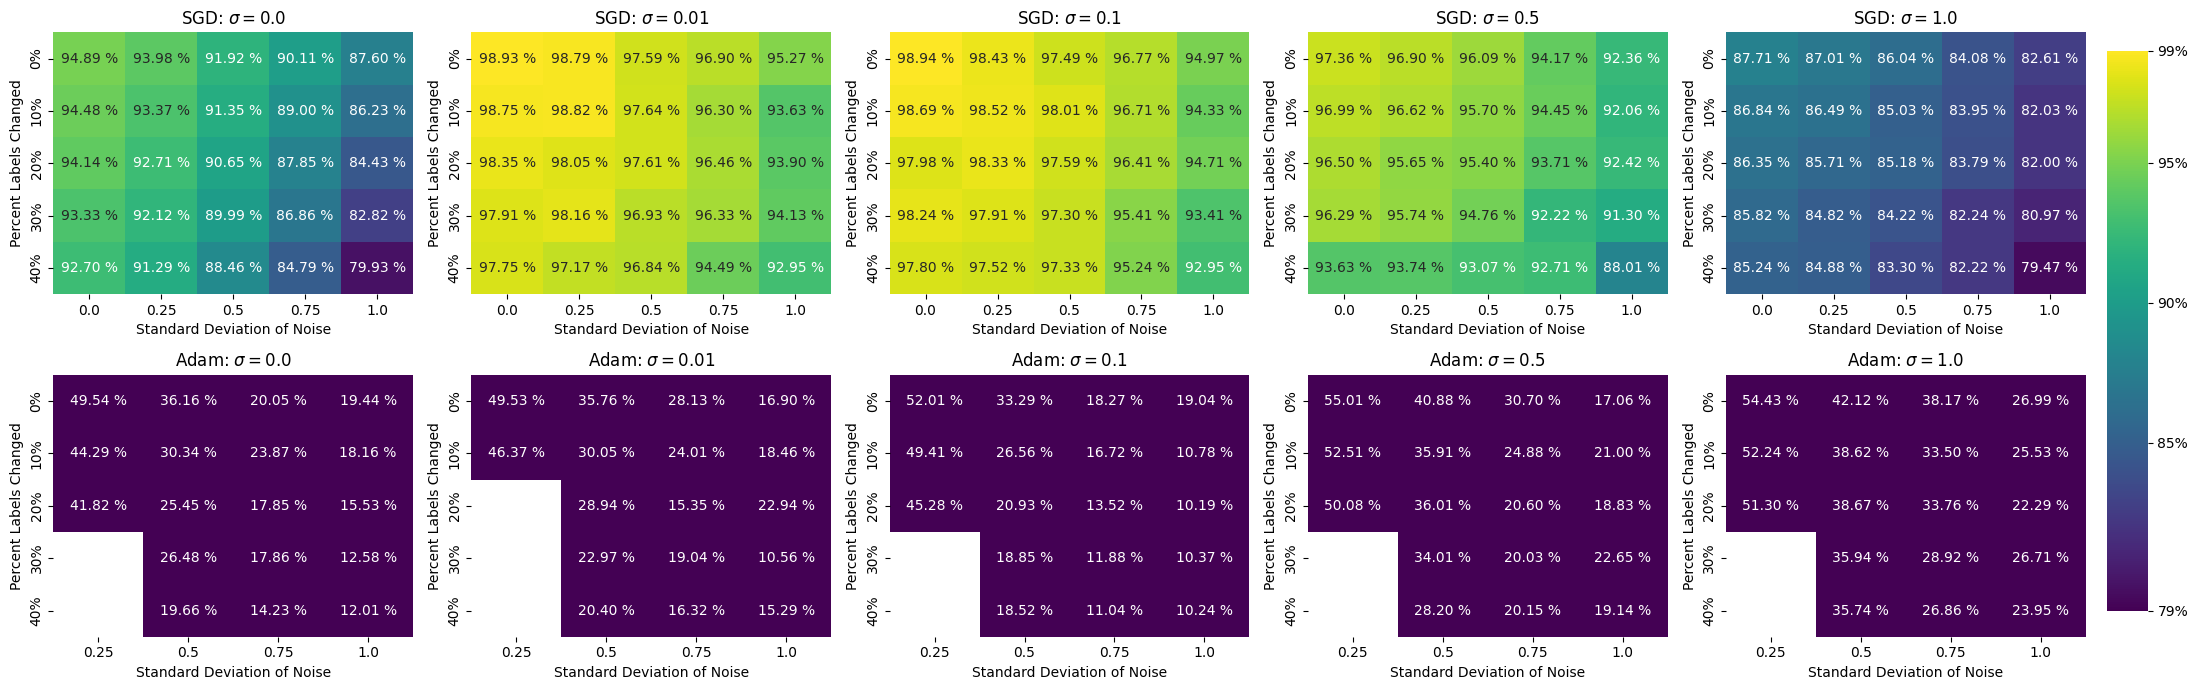

In [4]:
fig,ax = plt.subplots(ncols = 6, nrows = 2, figsize = (22,7), gridspec_kw={'width_ratios': [10,10,10,10,10,1]})
cbar_bool = False
cbar_ax = fig.add_axes([0.96, 0.12, .0185, 0.8])
for s in enumerate([0., 0.01, 0.1, 0.5, 1.]):
    g = sns.heatmap(
        pd.pivot(
            sgd[sgd['s'] == s[1]],
            index = 'y',
            columns = 'x',
            values = 'percent'
        ),
        annot=True,
        fmt='.2f',
        ax = ax[0,s[0]],
        vmin = 79.,
        vmax = 99.,
        cmap='viridis',
        cbar=False,
    )
    # g.set(xlabel=None,ylabel=None)
    if s[0] == 4: cbar_bool = True
    g = sns.heatmap(
        pd.pivot(
            adam[adam['s'] == s[1]],
            index = 'y',
            columns = 'x',
            values = 'percent'
        ),
        annot=True,
        fmt='.2f',
        ax = ax[1,s[0]],
        vmin = 79,
        vmax = 99.,
        cmap = 'viridis',
        cbar=cbar_bool,
        cbar_ax=cbar_ax
    )
    # g.set(xlabel=None,ylabel=None)

    ax[0,s[0]].set_title(f'SGD: $\sigma={s[1]}$')
    ax[1,s[0]].set_title(f'Adam: $\sigma={s[1]}$')

    for t in ax[0,s[0]].texts: t.set_text(t.get_text() + " %")
    for t in ax[1,s[0]].texts: t.set_text(t.get_text() + " %")

    for i in range(2):
        ax[i,s[0]].set_xlabel('Standard Deviation of Noise')
        ax[i,s[0]].set_ylabel('Percent Labels Changed')

ax[0,5].set_axis_off()
ax[1,5].set_axis_off()

cbar_ax.set_yticks([79,85,90,95,99])
cbar_ax.set_yticklabels([x.get_text() + '%' for x in cbar_ax.get_yticklabels()])

plt.tight_layout()
# plt.savefig('mnist_noise_full.png', dpi = 250)

/tmp/ipykernel_30141/1950510073.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


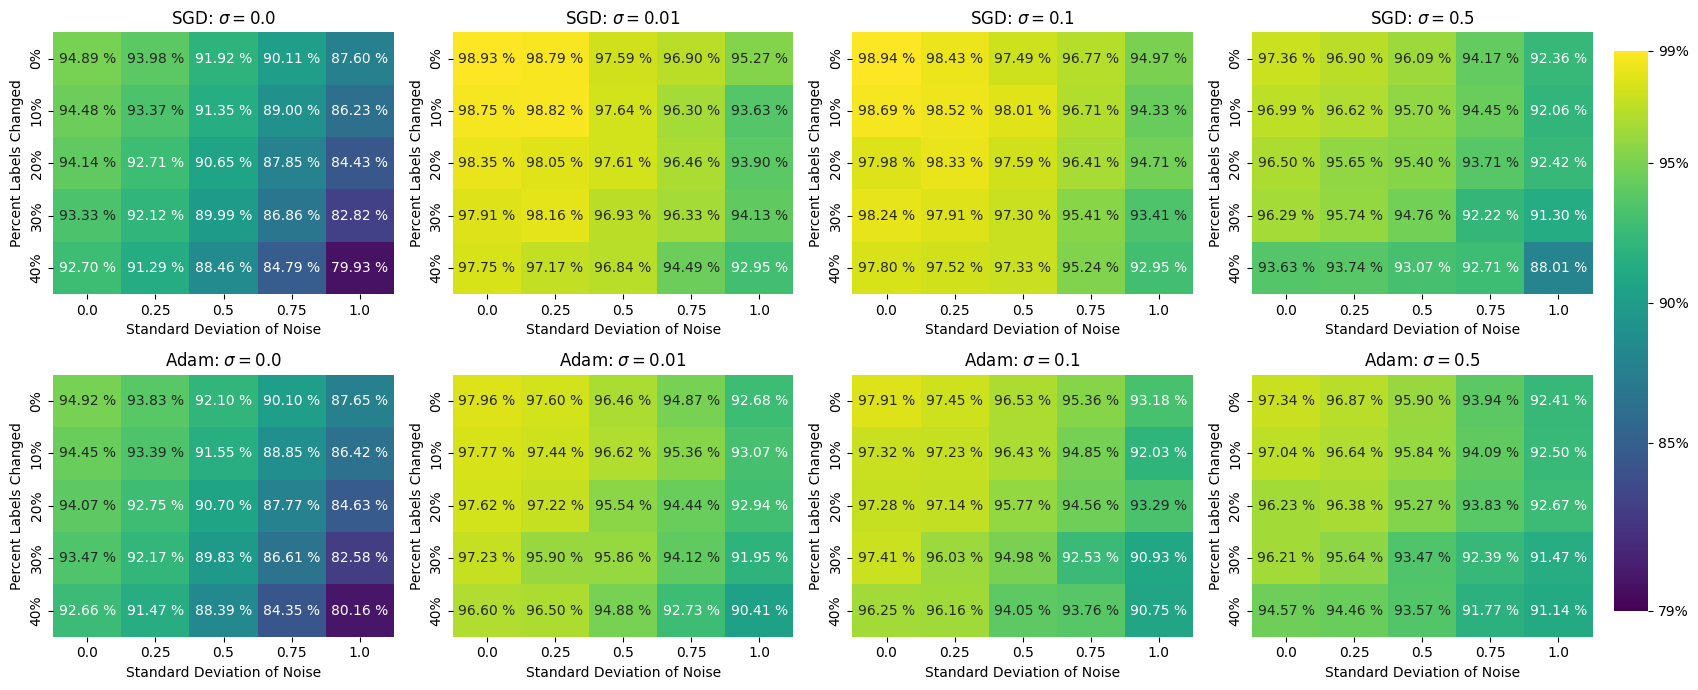

In [28]:
# MNIST
fig,ax = plt.subplots(ncols = 5, nrows = 2, figsize = (17,7), gridspec_kw={'width_ratios': [12,12,12,12,1]})
cbar_bool = False
cbar_ax = fig.add_axes([0.9525, 0.12, .02, 0.8])
for s in enumerate([0., 0.01, 0.1, 0.5]):
    g = sns.heatmap(
        pd.pivot(
            sgd[sgd['s'] == s[1]],
            index = 'y',
            columns = 'x',
            values = 'percent'
        ),
        annot=True,
        fmt='.2f',
        ax = ax[0,s[0]],
        vmin = 79.,
        vmax = 99.,
        cmap='viridis',
        cbar=False,
    )
    # g.set(xlabel=None,ylabel=None)
    if s[0] == 3: cbar_bool = True
    g = sns.heatmap(
        pd.pivot(
            adam[adam['s'] == s[1]],
            index = 'y',
            columns = 'x',
            values = 'percent'
        ),
        annot=True,
        fmt='.2f',
        ax = ax[1,s[0]],
        vmin = 79,
        vmax = 99.,
        cmap = 'viridis',
        cbar=cbar_bool,
        cbar_ax=cbar_ax
    )
    # g.set(xlabel=None,ylabel=None)

    ax[0,s[0]].set_title(f'SGD: $\sigma={s[1]}$')
    ax[1,s[0]].set_title(f'Adam: $\sigma={s[1]}$')

    for t in ax[0,s[0]].texts: t.set_text(t.get_text() + " %")
    for t in ax[1,s[0]].texts: t.set_text(t.get_text() + " %")

    for i in range(2):
        ax[i,s[0]].set_xlabel('Standard Deviation of Noise')
        ax[i,s[0]].set_ylabel('Percent Labels Changed')

ax[0,4].set_axis_off()
ax[1,4].set_axis_off()

cbar_ax.set_yticks([79,85,90,95,99])
cbar_ax.set_yticklabels([x.get_text() + '%' for x in cbar_ax.get_yticklabels()])

plt.tight_layout()
plt.savefig('mnist_noise_4.png', dpi = 250)

/tmp/ipykernel_22538/1849331828.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


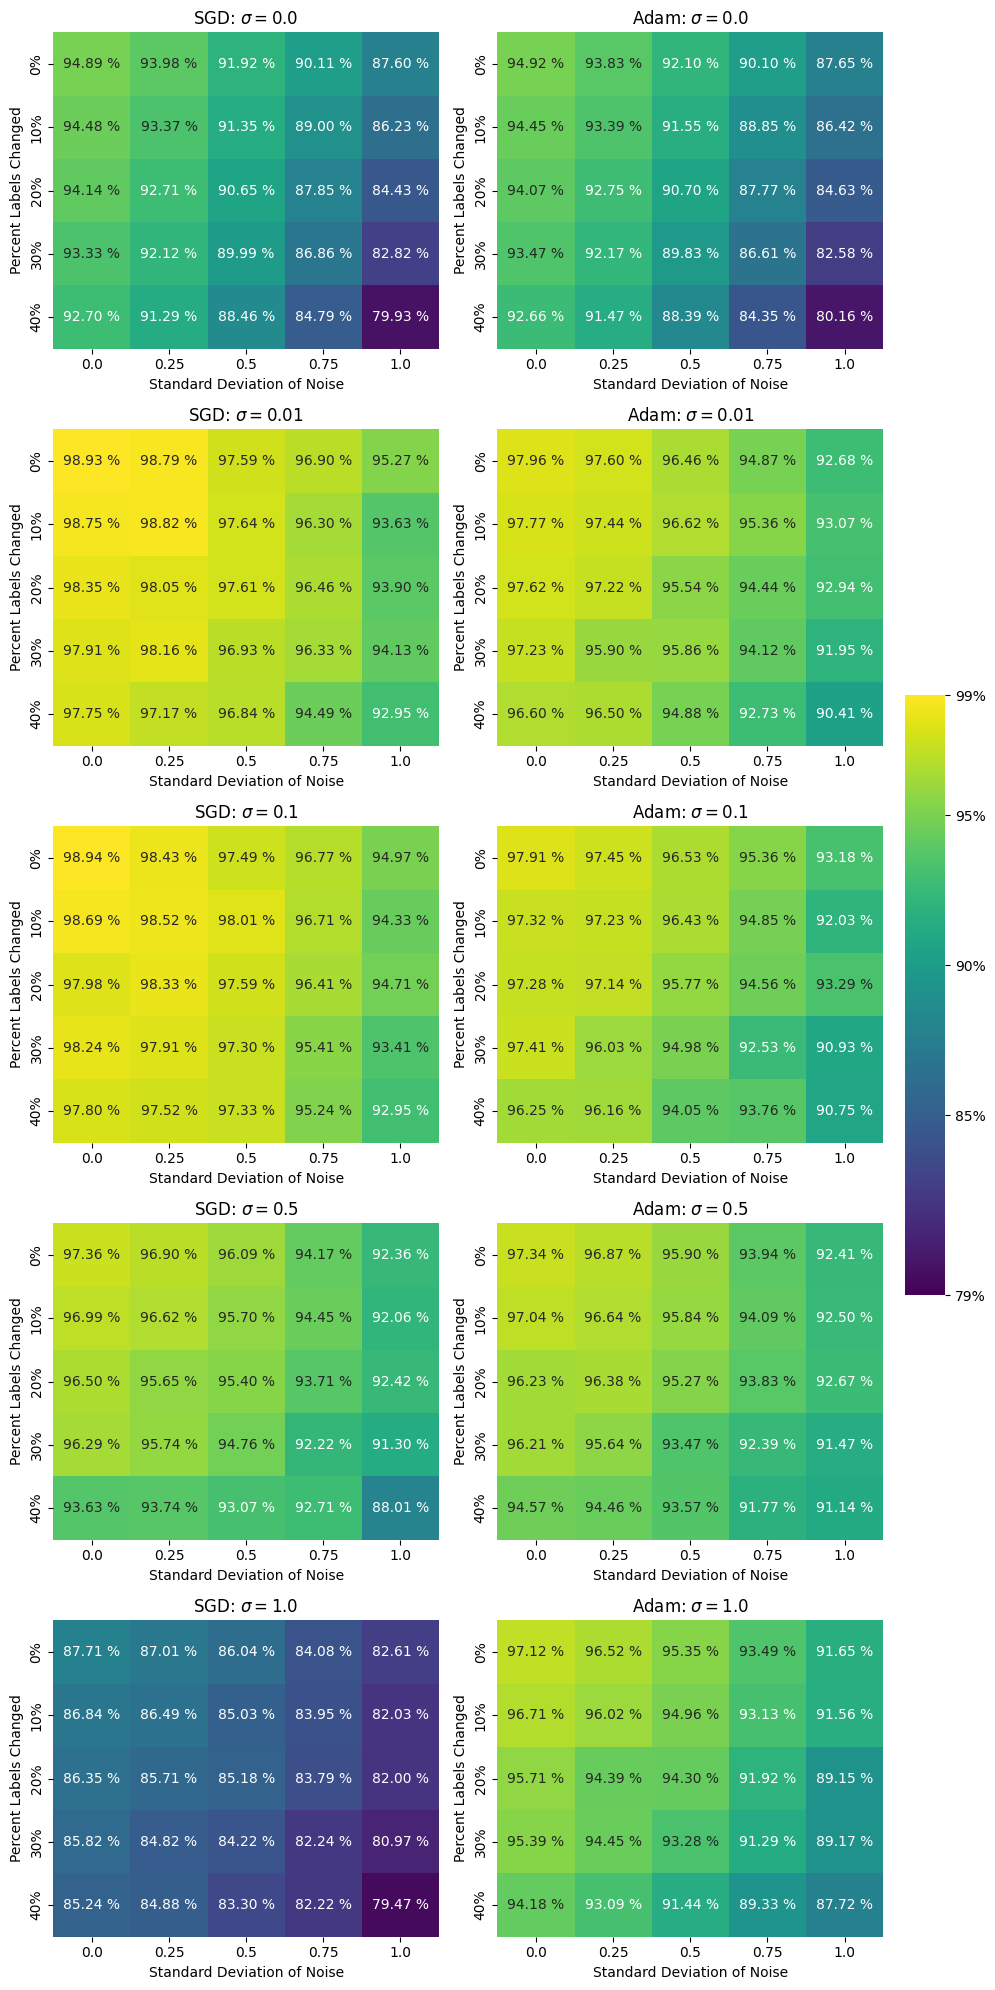

In [21]:
# MNIST
fig,ax = plt.subplots(ncols = 3, nrows = 5, figsize = (10,20), gridspec_kw={'width_ratios': [10,10,1]})
cbar_bool = False
cbar_ax = fig.add_axes([0.91, 0.35, .04, 0.3])
for s in enumerate([0., 0.01, 0.1, 0.5, 1.]):
    g = sns.heatmap(
        pd.pivot(
            sgd[sgd['s'] == s[1]],
            index = 'y',
            columns = 'x',
            values = 'percent'
        ),
        annot=True,
        fmt='.2f',
        ax = ax[s[0],0],
        vmin = 79.,
        vmax = 99.,
        cmap='viridis',
        cbar=False,
    )
    # g.set(xlabel=None,ylabel=None)
    if s[0] == 4: cbar_bool = True
    g = sns.heatmap(
        pd.pivot(
            adam[adam['s'] == s[1]],
            index = 'y',
            columns = 'x',
            values = 'percent'
        ),
        annot=True,
        fmt='.2f',
        ax = ax[s[0],1],
        vmin = 79,
        vmax = 99.,
        cmap = 'viridis',
        cbar=cbar_bool,
        cbar_ax=cbar_ax
    )
    # g.set(xlabel=None,ylabel=None)

    ax[s[0],0].set_title(f'SGD: $\sigma={s[1]}$')
    ax[s[0],1].set_title(f'Adam: $\sigma={s[1]}$')

    for t in ax[s[0],0].texts: t.set_text(t.get_text() + " %")
    for t in ax[s[0],1].texts: t.set_text(t.get_text() + " %")

    for i in range(2):
        ax[s[0],i].set_xlabel('Standard Deviation of Noise')
        ax[s[0],i].set_ylabel('Percent Labels Changed')

for i in range(5):
    ax[i,2].set_axis_off()

cbar_ax.set_yticks([79,85,90,95,99])
cbar_ax.set_yticklabels([x.get_text() + '%' for x in cbar_ax.get_yticklabels()])

plt.tight_layout()
plt.savefig('mnist_noise_full_vertical.png', dpi = 250)

In [3]:
sgd = pd.read_csv('noise_heatmap_cifar10_sgd.csv')
adam = pd.read_csv('noise_heatmap_cifar10_adam.csv')

sgd['percent'] = sgd['val_accuracy'].apply(lambda x: np.round(100 * x,2))
adam['percent'] = adam['val_accuracy'].apply(lambda x: np.round(100 * x,2))

sgd['y'] = sgd['y'].apply(lambda x: str(int(100*x)) + '%')
adam['y'] = adam['y'].apply(lambda x: str(int(100*x)) + '%')

/tmp/ipykernel_3183/181387717.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar_ax.set_yticklabels([x.get_text() + '%' for x in cbar_ax.get_yticklabels()])
/tmp/ipykernel_3183/181387717.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


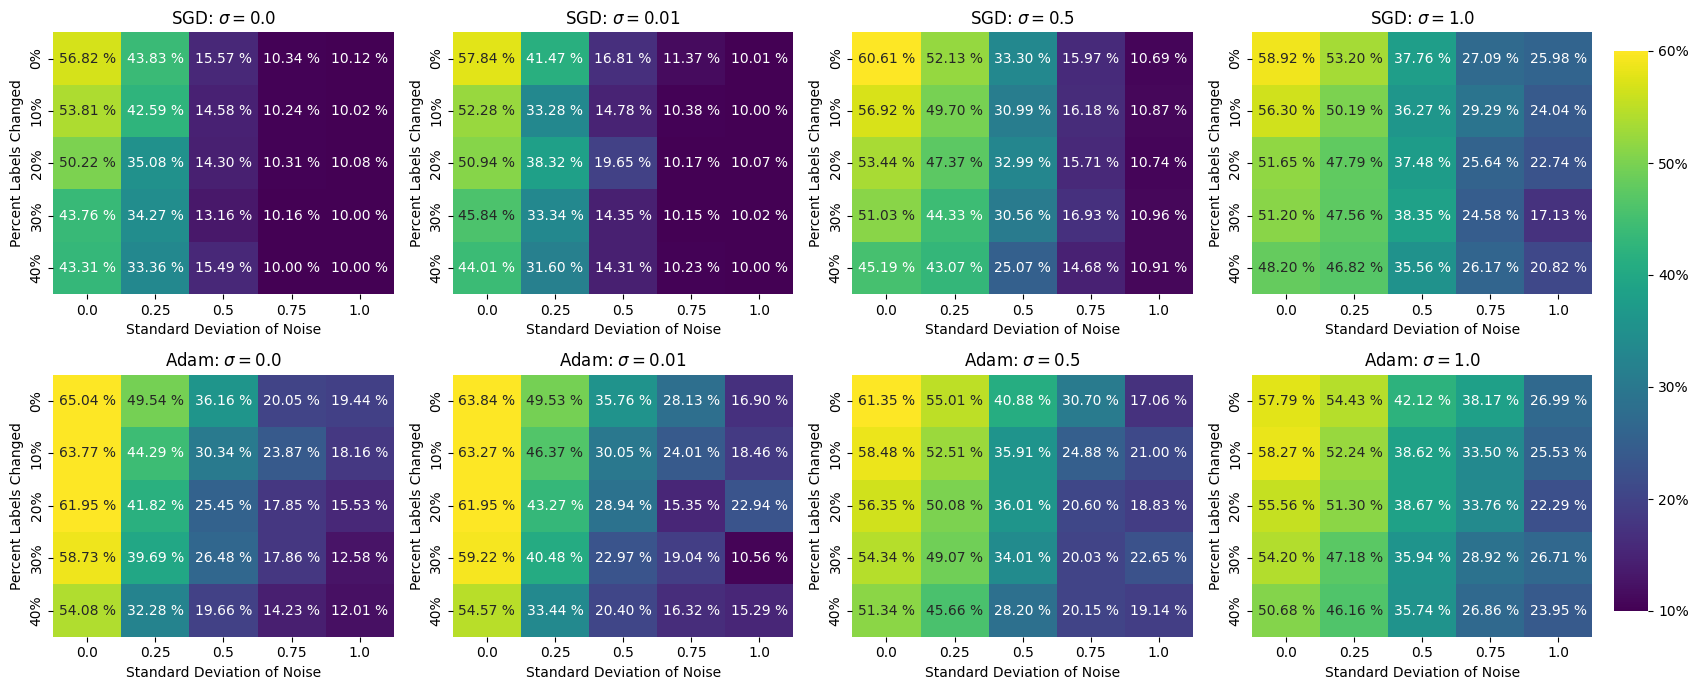

In [6]:
# CIFAR10
fig,ax = plt.subplots(ncols = 5, nrows = 2, figsize = (17,7), gridspec_kw={'width_ratios': [12,12,12,12,1]})
cbar_bool = False
cbar_ax = fig.add_axes([0.9525, 0.12, .02, 0.8])
for s in enumerate([0., 0.01, 0.5, 1.]):
    g = sns.heatmap(
        pd.pivot(
            sgd[sgd['s'] == s[1]],
            index = 'y',
            columns = 'x',
            values = 'percent'
        ),
        annot=True,
        fmt='.2f',
        ax = ax[0,s[0]],
        vmin = 10.,
        vmax = 60.,
        cmap='viridis',
        cbar=False,
    )
    # g.set(xlabel=None,ylabel=None)
    if s[0] == 3: cbar_bool = True
    g = sns.heatmap(
        pd.pivot(
            adam[adam['s'] == s[1]],
            index = 'y',
            columns = 'x',
            values = 'percent'
        ),
        annot=True,
        fmt='.2f',
        ax = ax[1,s[0]],
        vmin = 10,
        vmax = 60.,
        cmap = 'viridis',
        cbar=cbar_bool,
        cbar_ax=cbar_ax
    )
    # g.set(xlabel=None,ylabel=None)

    ax[0,s[0]].set_title(f'SGD: $\sigma={s[1]}$')
    ax[1,s[0]].set_title(f'Adam: $\sigma={s[1]}$')

    for t in ax[0,s[0]].texts: t.set_text(t.get_text() + " %")
    for t in ax[1,s[0]].texts: t.set_text(t.get_text() + " %")

    for i in range(2):
        ax[i,s[0]].set_xlabel('Standard Deviation of Noise')
        ax[i,s[0]].set_ylabel('Percent Labels Changed')

ax[0,4].set_axis_off()
ax[1,4].set_axis_off()

# cbar_ax.set_yticks([79,85,90,95,99])
cbar_ax.set_yticklabels([x.get_text() + '%' for x in cbar_ax.get_yticklabels()])

plt.tight_layout()
plt.savefig('cifar_noise_4.png', dpi = 250)

/tmp/ipykernel_3183/186410580.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar_ax.set_yticklabels([x.get_text() + '%' for x in cbar_ax.get_yticklabels()])
/tmp/ipykernel_3183/186410580.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


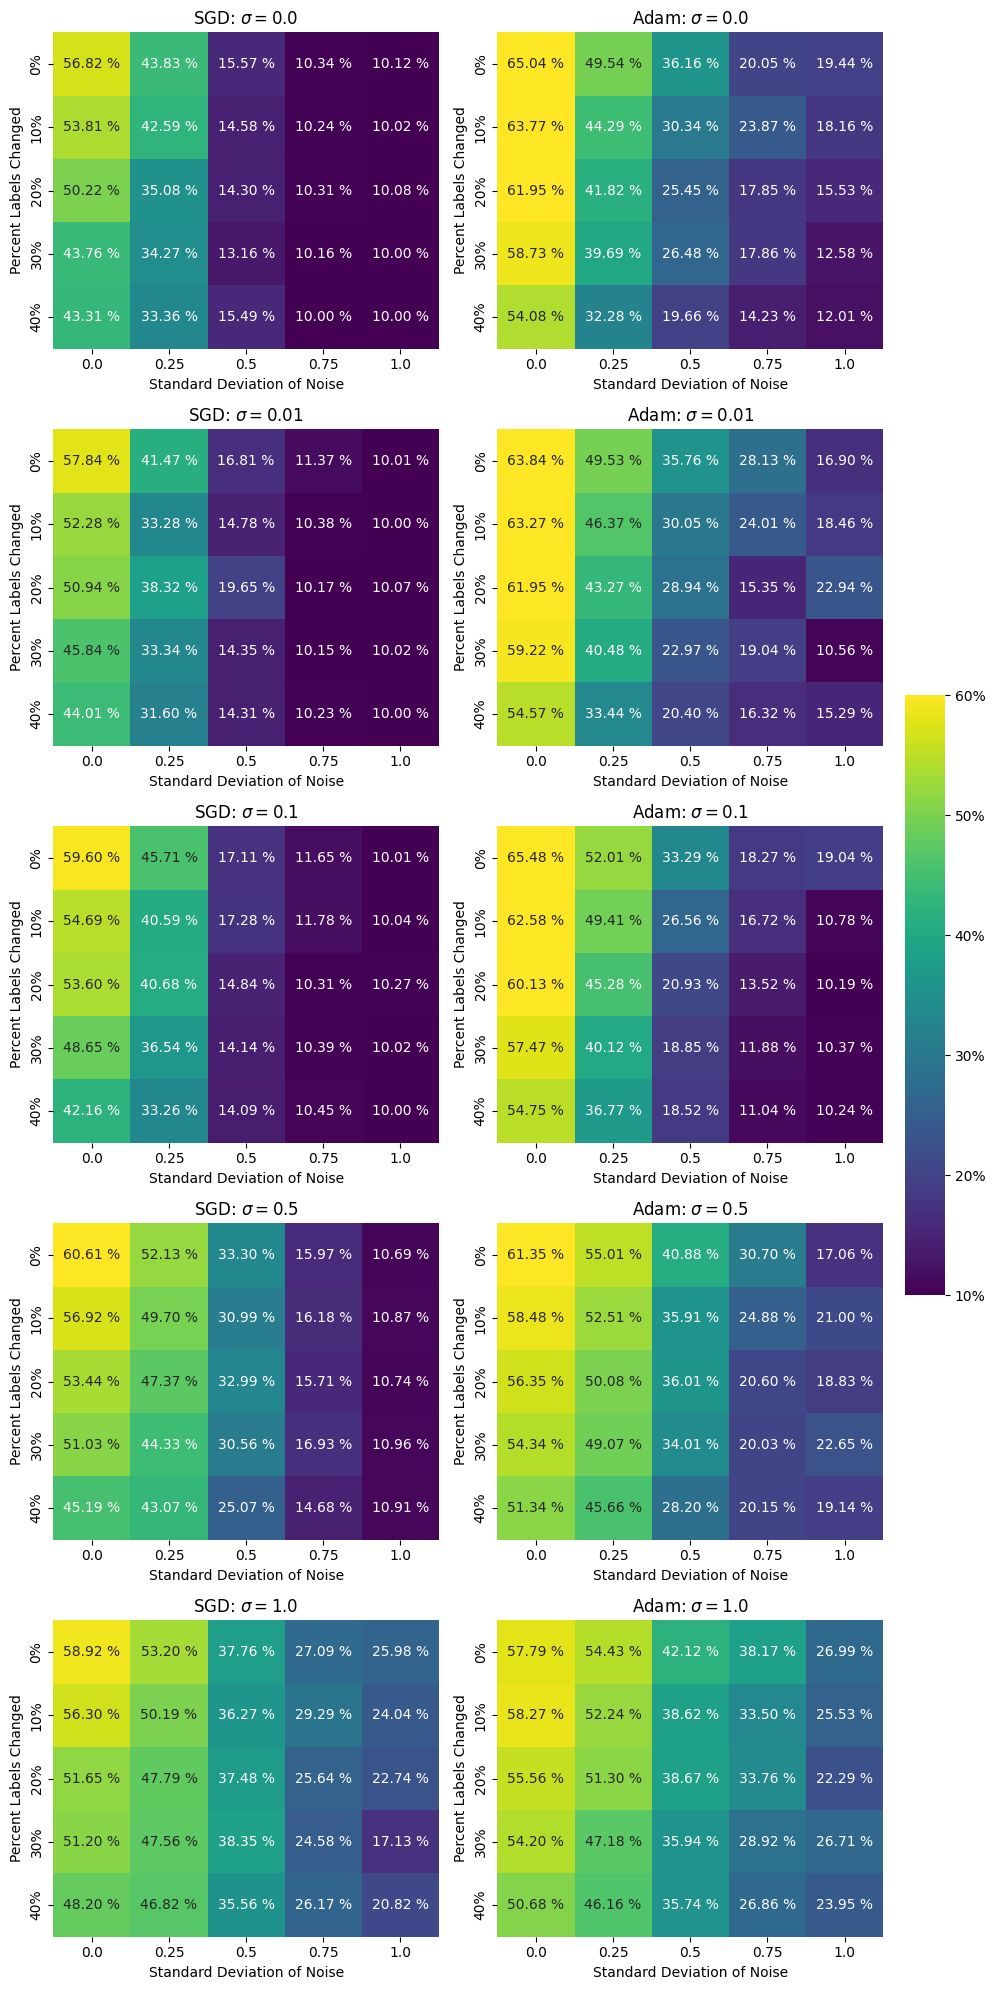

In [5]:
# MNIST
fig,ax = plt.subplots(ncols = 3, nrows = 5, figsize = (10,20), gridspec_kw={'width_ratios': [10,10,1]})
cbar_bool = False
cbar_ax = fig.add_axes([0.91, 0.35, .04, 0.3])
for s in enumerate([0., 0.01, 0.1, 0.5, 1.]):
    g = sns.heatmap(
        pd.pivot(
            sgd[sgd['s'] == s[1]],
            index = 'y',
            columns = 'x',
            values = 'percent'
        ),
        annot=True,
        fmt='.2f',
        ax = ax[s[0],0],
        vmin = 10,
        vmax = 60.,
        cmap='viridis',
        cbar=False,
    )
    # g.set(xlabel=None,ylabel=None)
    if s[0] == 4: cbar_bool = True
    g = sns.heatmap(
        pd.pivot(
            adam[adam['s'] == s[1]],
            index = 'y',
            columns = 'x',
            values = 'percent'
        ),
        annot=True,
        fmt='.2f',
        ax = ax[s[0],1],
        vmin = 10,
        vmax = 60.,
        cmap = 'viridis',
        cbar=cbar_bool,
        cbar_ax=cbar_ax
    )
    # g.set(xlabel=None,ylabel=None)

    ax[s[0],0].set_title(f'SGD: $\sigma={s[1]}$')
    ax[s[0],1].set_title(f'Adam: $\sigma={s[1]}$')

    for t in ax[s[0],0].texts: t.set_text(t.get_text() + " %")
    for t in ax[s[0],1].texts: t.set_text(t.get_text() + " %")

    for i in range(2):
        ax[s[0],i].set_xlabel('Standard Deviation of Noise')
        ax[s[0],i].set_ylabel('Percent Labels Changed')

for i in range(5):
    ax[i,2].set_axis_off()

# cbar_ax.set_yticks([79,85,90,95,99])
cbar_ax.set_yticklabels([x.get_text() + '%' for x in cbar_ax.get_yticklabels()])

plt.tight_layout()
plt.savefig('cifar_noise_full_vertical.png', dpi = 250)